# Stab mit Volumenkraft und vorgegebener Spannung 



\begin{align}
-E \frac{\partial^2 u}{\partial x^2}&= f &x\in (0,2)\label{inner}\\
u(0) & =0 &\text{Verschiebung vorgegeben}\\
E \frac{\partial u(2)}{\partial x} & =g &\text{Spannung vorgegeben}
\end{align}


### Lösen des Gleichungssystems

Analytische Lösung $$u_{ana}=-\frac{f}{2E}x^2+\left(\frac{g}{E}+2\frac{f}{E}\right)x$$ verglichen.

Als Beispiel sei der Stab aus Baustahl und $2 m$ lang, mit einem Querschnitt mit Radius von $10 cm$, an einem Ende an der Decke befestigt und am unteren Ende wird eine Spannung vorgegeben. Der Stab wird durch Schwerkraft nach unten gezogen. 

* Was heißt physikalisch wenn bei 2 m die vorgegebene Spannung 0 Pa beträgt?
* Was heißt physikalisch wenn bei 2 m die vorgegebene Spannung positiv ist?
* Was heißt physikalisch wenn bei 2 m die vorgegebene Spannung negativ ist?

Für das numerische Beispiel sei das E-Modul $E=200 MPa$, $u_{Dirichlet1}=0 m$, $f=7850\cdot 9.8066\frac{N}{m^3}$ und die Spannung $E \frac{\partial u(2)}{\partial x}=g$ bei 2 m einmal 0 Pa, einmal "echt" größer als null und einmal "echt" kleiner als null.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import numpy as np
from scipy import integrate
from fem.funktionen import *
import seaborn as sns
#sns.set()
mpl.rcParams["figure.figsize"] = (20,7)
mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['lines.markersize'] = 15
#sns.set()
farben = sns.color_palette()
plt.style.use('seaborn-darkgrid')
farben = sns.color_palette()

In [8]:

emod=200 #stahl
#emod=0.1 # gummi
#emod=0.01 # styropor, Dichte theoretisch auch anpassen
#emod=9
A=np.pi*(10/100.)**2
Laenge=2.

E=emod*10**9
u0=0
g=100*10**6
gewicht=(7850)*(Laenge*A)
kraft=0*gewicht*9.8066

f=kraft/(Laenge*A)



In [9]:
g*A

3141592.6535897935

0.001
0.0


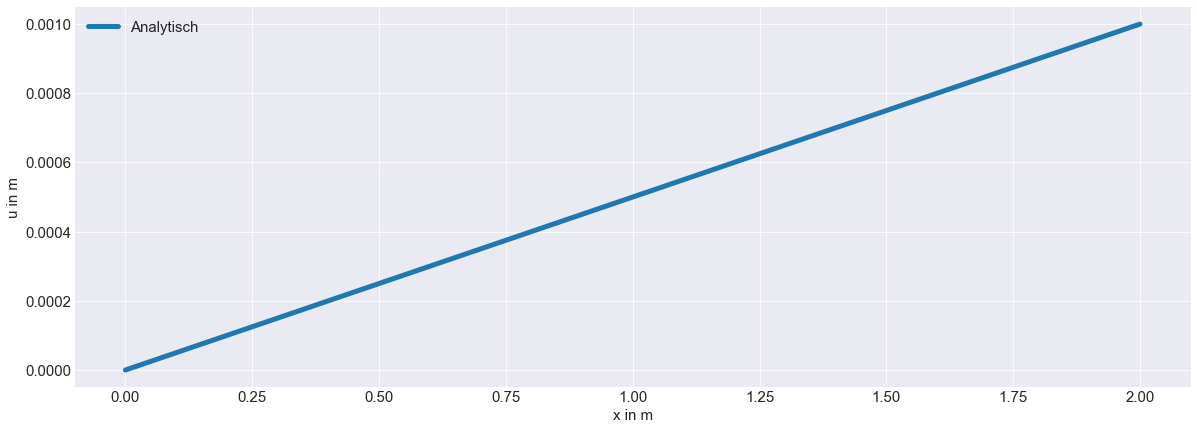

In [10]:
x=np.linspace(0,2 ,1000)



def uAna(x):

    wert=(-f/(2*E))*x**2+(g/E+2*f/E)*x
        

    return wert

ax=plt.axes()
ax.tick_params(labelsize=15)
ax.plot(x,uAna(x), label='Analytisch', color=farben[0]),
ax.tick_params(labelsize=15)
box = ax.get_position()
ax.set_xlabel(xlabel='x in m',fontsize=15)
ax.set_ylabel(ylabel='u in m',fontsize=15)
plt.legend(loc='best',fontsize=15)
print(max(uAna(x)))
print(min(uAna(x)))

## Berechnung der Kenngrößen: Postprocessing

Nach dem Solving-Schritt ist eine FEM-Approximation $u_{FEM}$ der Verschiebung $u$ bekannt. Meistens ist die eigentliche Kenngröße jedoch nicht die Verschiebung, sondern eine Größe, die sich aus der Verschiebung berechnet. In der linearen Elastizität z.B. die Dehnung oder die Spannung.

\begin{align}
\sigma & =E \epsilon &\text{ Hook-Gesetz: Spannung-Dehnung}\\
\epsilon & = \frac{\partial u}{\partial x} &\text{ Dehnung-Verschiebung}
\end{align}

Meistens wird aus der Dehnung und Spannung noch eine Vergleichsdehnung bzw. Vergleichsspannung berechnet (z.B. von Mises Vergleichsdehnung bzw. Vergleichsspannung). In 1D ist das nur der Betrag:

\begin{align}
\sigma_V & =\sqrt{\sigma^2} &\text{ Vergleichsdehnung}\\
\epsilon_V & = \frac{1}{1+\nu}\sqrt{\epsilon^2} &\text{ Vergleichsspannung}
\end{align}

Wobei $\nu=0.3$ bei Stahl; siehe [Issler et. al, 2003].

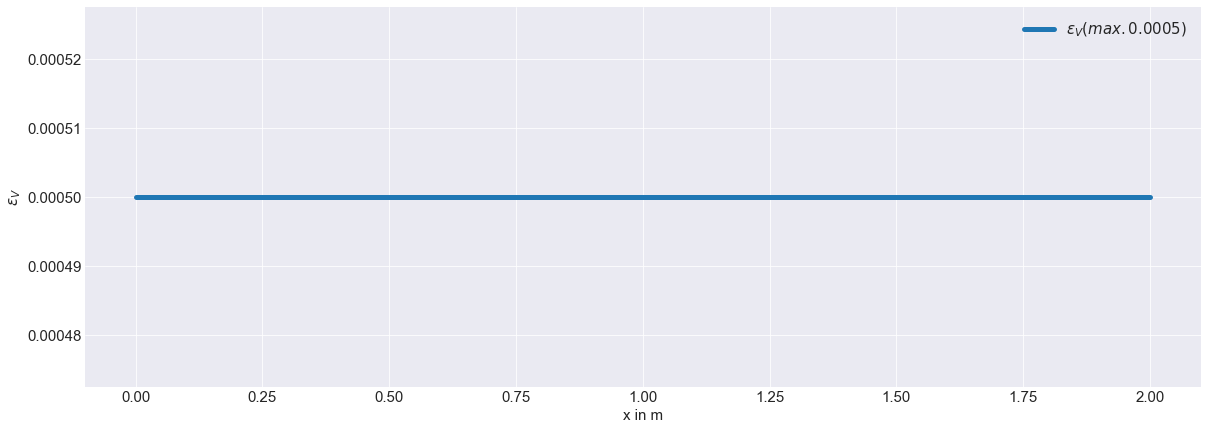

In [11]:
def dehnung(y):

    wert=(-f/(E))*x+(g/E+2*f/E)    
        

    return wert

def spannung(y):
    wert=E*dehnung(y)
    return wert


ax=plt.axes()
ax.tick_params(labelsize=15)
ax.plot(x,abs(dehnung(x)), label=r'$\epsilon_V (max. {0})$'.format(max(abs(dehnung(x)))), color=farben[0])



ax.tick_params(labelsize=15)
ax.set_xlabel(xlabel='x in m',fontsize=15)
ax.set_ylabel(ylabel=r'$\epsilon_V$',fontsize=15)
plt.legend(loc='best',fontsize=15)

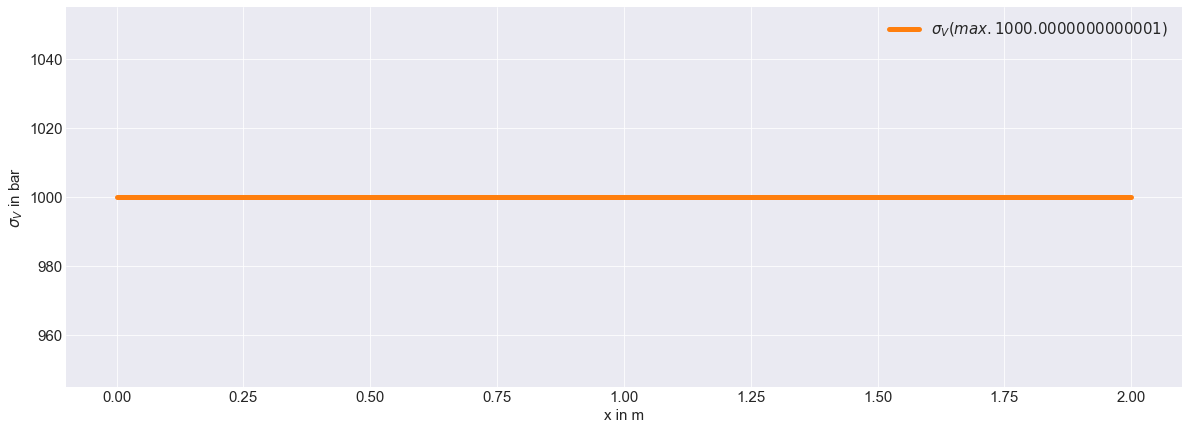

In [12]:
ax=plt.axes()
ax.plot(x,abs(spannung(x))*10**(-5), label=r'$\sigma_V (max. {0})$'.format(max(abs(spannung(x)*10**(-5)))), color=farben[1])



ax.tick_params(labelsize=15)
ax.set_xlabel(xlabel='x in m',fontsize=15)
ax.set_ylabel(ylabel=r'$\sigma_V$ in bar',fontsize=15)

plt.legend(loc='best',fontsize=15)

$$\Pi=\frac{1}{2}A\int_{0}^{2}\epsilon\sigma dx$$

In [13]:
0.5*A*integrate.simps(dehnung(x)*spannung(x), x)

1570.7963267948967

Ist das Ergebnis noch physiklaisch, ist die Spannung noch im linearen Bereich? 

### Übungen:

* Berechnen Sie dieses Beispiel in 3D in ANSYS
    * Ist das Ergebnis ähnlich? 
    * Wie erklären sich ggf. Unterschiede? 

* Geben Sie postive und negative Drücke bei 2 m an
* Bei welchem Druck wird die Streckgrenze erreicht?